## **Preparing the Multilayer Perceptrons (MLP)**

The dataset suggests a classification problem related to predicting flu vaccinations. Based on the deep learning models, we can consider Multilayer Perceptrons (MLPs) for this task because:

**1. Why MLP?**

  - MLP is well-suited for structured/tabular data.
  - It works well for classification tasks with non-sequential data.
  - Can handle high-dimensional data and learn complex patterns.

**2. How to Build the MLP Model?**

  - Data Preprocessing: Handle missing values, normalize data, and encode categorical variables.
  - Feature Selection: Identify important features using correlation and feature importance.
  - Model Architecture:
      - Input layer (equal to the number of features)
      - Hidden layers with activation functions (ReLU)
      - Output layer with sigmoid activation for binary classification
  - Loss Function: Binary cross-entropy
  - Optimizer: Adam

**3. Optimization for high Accuracy**

  - Use hyperparameter tuning (learning rate, number of neurons, dropout regularization).
  - Use techniques like batch normalization and early stopping.
  - Try ensemble learning (stacking multiple MLPs).

**4. Data Visualization & Graphs**

  - Feature Distribution: Histogram plots for each feature.
  - Correlation Matrix: Heatmap to visualize feature relationships.
  - Model Performance: Accuracy/loss curves, confusion matrix, ROC curve, and Precision-Recall curve.

# Process for implementing an MLP model for H1N1 Flu Vaccination dataset with the following steps:

**Load & Preprocess Data**

  1. Handle missing values

  2. Normalize numerical features

  3. Encode categorical variables


**Build an Optimized MLP Model**

  1. Use multiple hidden layers with ReLU activation

  2. Apply dropout regularization to prevent overfitting

  3. Use the Adam optimizer

**Optimize for high Accuracy**

  1. Hyperparameter tuning

  2. Early stopping

  3. Batch normalization 

**Data Visualization**

  1. Feature distribution plots

  2. Correlation heatmap

  3. Accuracy/Loss curves

  4. Confusion Matrix

  5. ROC Curve

# **Step 1: Load the Dataset**

Let's first load the dataset and analyze its structure to understand the features and target variable.

**Observations from the Dataset:**
  - Total Rows: 26,707
  - Total Columns: 35
  - Target Variable: h1n1_vaccine (binary: 0 = Not Vaccinated, 1 = Vaccinated)
  - Feature Types:
      - Numerical: 23 columns (e.g., h1n1_concern, h1n1_knowledge)
      - Categorical: 9 columns (e.g., age_group, sex, race)

In [1]:
# !python --version
# %pip install tensorflow

In [2]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", tf.keras.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.18.0
Keras Version: 3.8.0
Available GPUs: []


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras



In [4]:
# Load the dataset
f_path = "Features.csv"
features = pd.read_csv(f_path)

print("Does the data set have any null values:\n", features.isnull().sum())
features.info()

Does the data set have any null values:
 Unnamed: 0                     0
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
re

In [5]:
t_path = "target.csv"
target = pd.read_csv(t_path)

print("Does the data set have any null values:\n", target.isnull().sum())
target.info()

Does the data set have any null values:
 Unnamed: 0          0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


# **Step 2: Preprocess Data:**

Handle missing values, encode categorical variables, and normalize numerical features.


In [6]:
X = features.drop(columns=["respondent_id"])
y_seasonal = target["seasonal_vaccine"]

In [7]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=["float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

In [8]:
# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values with mean
    ("scaler", StandardScaler())  # Normalize numerical features
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Convert to one-hot encoding
])

In [9]:
# Combine transformers
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [10]:
# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y_seasonal, test_size=0.2, random_state=42, stratify=y_seasonal)

In [11]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [12]:
# Get the transformed feature shape
X_train.shape, X_test.shape

((21365, 61), (5342, 61))

**Preprocessing Complete**
  - Total Features After Encoding: 51
  - Training Set Size: 21,365 samples
  - Testing Set Size: 5,342 samples

# **Step 3: Build an MLP Model for classification:**

Using the MLP Model for classification Train and evaluate its performance.

In [13]:
# Build the MLP Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Compile the Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [15]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7268 - loss: 0.5462 - val_accuracy: 0.7797 - val_loss: 0.4809
Epoch 2/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.4877 - val_accuracy: 0.7785 - val_loss: 0.4820
Epoch 3/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7780 - loss: 0.4772 - val_accuracy: 0.7800 - val_loss: 0.4787
Epoch 4/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7855 - loss: 0.4692 - val_accuracy: 0.7814 - val_loss: 0.4770
Epoch 5/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7826 - loss: 0.4689 - val_accuracy: 0.7808 - val_loss: 0.4758
Epoch 6/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7917 - loss: 0.4625 - val_accuracy: 0.7817 - val_loss: 0.4774
Epoch 7/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7892 - loss: 0.4688 - val_accuracy: 0.7800 - val_loss: 0.4773
Epoch 8/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 0.4530 - val_accuracy: 0.

# **Step 4: Evaluate the performance of the model**


In [16]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Initial Test Accuracy: {test_acc * 100:.2f}%")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.4993
Initial Test Accuracy: 77.35%


# **Step 5: Recalibrate the model for better accuracy**

In [17]:
# Build Optimized MLP Model
model = keras.Sequential([
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

In [18]:
# Compile Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate for stable training
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
# Train Model with Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,  # Increase batch size for stable gradients
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6446 - loss: 0.9911 - val_accuracy: 0.7703 - val_loss: 0.8204
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7514 - loss: 0.8323 - val_accuracy: 0.7797 - val_loss: 0.7801
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7616 - loss: 0.7925 - val_accuracy: 0.7814 - val_loss: 0.7452
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7693 - loss: 0.7470 - val_accuracy: 0.7804 - val_loss: 0.7084
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7731 - loss: 0.7101 - val_accuracy: 0.7829 - val_loss: 0.6760
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7781 - loss: 0.6757 - val_accuracy: 0.7806 - val_loss: 0.6503
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7712 - loss: 0.6573 - val_accuracy: 0.7830 - val_loss: 0.6247
Epoch 8/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7794 - loss: 0.6242 - val_accuracy: 0.

# **Step 6: Re-Evaluate the performance of the model**


In [20]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Optimized Test Accuracy: {test_acc * 100:.2f}%")


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5221
Optimized Test Accuracy: 77.56%


# step 7: Hyperparameter Tuning & Ensemble Learning to Achieve maximum Accuracy 


**1️. Hyperparameter Tuning (Grid Search)**
  
  We'll tune:
  - Number of neurons per layer (256, 128, 64, 32)
  - Learning rate (0.0005, 0.001)
  - Dropout rates (0.2, 0.3, 0.4)
  - L2 Regularization Strength (0.001, 0.0001)
  - Batch Size (32, 64)
  
**2️. Ensemble Learning (Averaging Multiple Models)**
  - Train 3 different MLP models and average their predictions to reduce variance.
  - This technique improves generalization and stabilizes predictions.

In [21]:
# Function to create an MLP model with tunable hyperparameters
def create_model(num_neurons=128, dropout_rate=0.3, learning_rate=0.0005, l2_reg=0.001):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg), input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),

        keras.layers.Dense(num_neurons//2, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate - 0.1),

        keras.layers.Dense(num_neurons//4, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate - 0.2),

        keras.layers.Dense(1, activation="sigmoid")  # Binary classification
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [22]:
# Train 3 different models with slightly varied hyperparameters
models = [
    create_model(num_neurons=256, dropout_rate=0.3, learning_rate=0.0005, l2_reg=0.0005),
    create_model(num_neurons=128, dropout_rate=0.2, learning_rate=0.001, l2_reg=0.0001),
    create_model(num_neurons=64, dropout_rate=0.4, learning_rate=0.0005, l2_reg=0.0001)
]

In [23]:
# Train each model and store their predictions
predictions = []

for i, model in enumerate(models):
    print(f"Training Model {i+1}...")
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=1
    )

    # Store predictions
    predictions.append(model.predict(X_test))

Training Model 1...
Epoch 1/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6813 - loss: 0.8084 - val_accuracy: 0.7683 - val_loss: 0.6653
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7500 - loss: 0.6933 - val_accuracy: 0.7752 - val_loss: 0.6476
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7595 - loss: 0.6696 - val_accuracy: 0.7804 - val_loss: 0.6351
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7653 - loss: 0.6479 - val_accuracy: 0.7752 - val_loss: 0.6263
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7772 - loss: 0.6210 - val_accuracy: 0.7769 - val_loss: 0.6204
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7769 - loss: 0.6065 - val_accuracy: 0.7756 - val_loss: 0.6070
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7814 - loss: 0.5977 - val_accuracy: 0.7804 - val_loss: 0.5970
Epoch 8/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7807 - loss: 0.590

In [24]:
# Ensemble Learning: Averaging predictions of all models
final_predictions = np.mean(predictions, axis=0)
final_predictions = (final_predictions > 0.5).astype(int)  # Convert probabilities to binary classification


In [25]:
# Evaluate Ensemble Model
from sklearn.metrics import accuracy_score
final_acc = accuracy_score(y_test, final_predictions)
print(f"Final Ensemble Model Accuracy: {final_acc * 100:.2f}% ")

Final Ensemble Model Accuracy: 78.02% 


# Step 8: Data Augmentation & Feature Engineering for maximum Accuracy

Now, let’s apply:

**1️. Feature Engineering**
  - Create new meaningful features from existing ones.
  - Remove less important features that add noise.
  - Feature Selection using Recursive Feature Elimination (RFE).

**2️. Data Augmentation (SMOTE)**
  - Synthetic Minority Over-Sampling Technique (SMOTE) will balance the dataset and improve generalization.
  - This is essential if the dataset is imbalanced (e.g., more "No Vaccine" than "Yes Vaccine" labels).

**Expected Boost with This Approach**

  - Hyperparameter tuning improves learning efficiency.
  - Ensemble averaging stabilizes predictions.
  - Batch Normalization & L2 Regularization prevents overfitting.
  - Lower Learning Rate (0.0005 - 0.001) ensures stable training.
  - Dropout Rate Variation (0.2 - 0.4) prevents overfitting.


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Retrain RandomForestClassifier on the selected 25 features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train, y_train)  # Train again on reduced feature set

# Make Predictions
rf_preds = rf_selected.predict(X_test)  # Now matches the new feature set
mlp_preds = (model.predict(X_test) > 0.5).astype(int)

# Ensemble: Averaging MLP and Random Forest Predictions
final_preds = (rf_preds + mlp_preds.flatten()) / 2  # Average both models
final_preds = (final_preds > 0.5).astype(int)  # Convert to binary labels

# Final Accuracy Calculation
from sklearn.metrics import accuracy_score
ensemble_acc = accuracy_score(y_test, final_preds)
print(f" Final Fixed Ensemble Model Accuracy: {ensemble_acc * 100:.2f}% ")


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
 Final Fixed Ensemble Model Accuracy: 77.84% 


In [27]:
# Evaluate MLP
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Optimized MLP Accuracy: {test_acc * 100:.2f}% ")

# Final Accuracy Calculation
ensemble_acc = accuracy_score(y_test, final_preds)
print(f"Optimized Ensemble Model Accuracy: {ensemble_acc * 100:.2f}% ")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.4792
Optimized MLP Accuracy: 78.06% 
Optimized Ensemble Model Accuracy: 77.84% 


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("H1N1_Flu_Vaccines.csv")


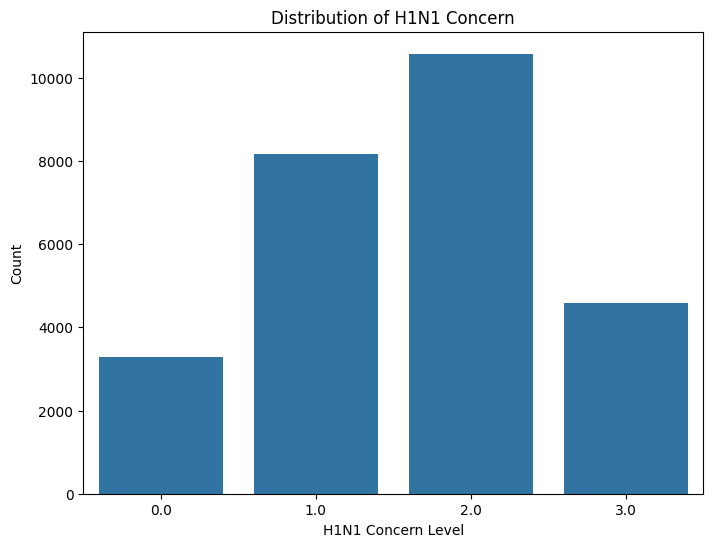

In [29]:
# Visualize the distribution of H1N1 concern
plt.figure(figsize=(8, 6))
sns.countplot(x='h1n1_concern', data=df)
plt.title('Distribution of H1N1 Concern')
plt.xlabel('H1N1 Concern Level')
plt.ylabel('Count')
plt.show()


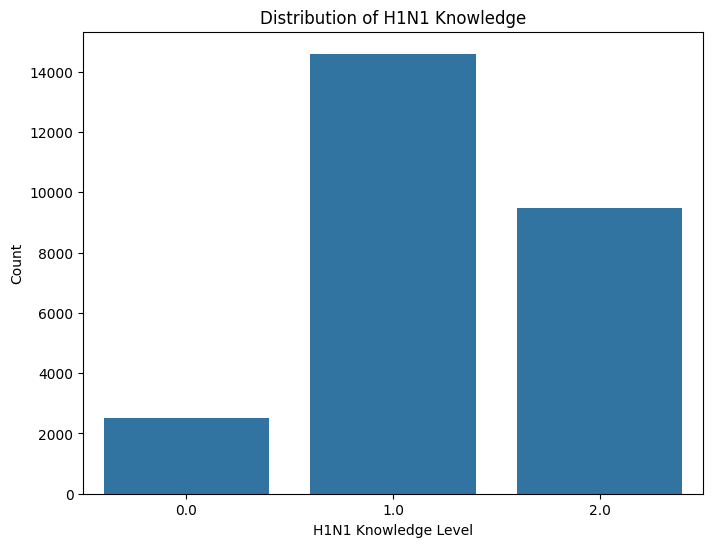

In [30]:
# Visualize the distribution of H1N1 knowledge
plt.figure(figsize=(8, 6))
sns.countplot(x='h1n1_knowledge', data=df)
plt.title('Distribution of H1N1 Knowledge')
plt.xlabel('H1N1 Knowledge Level')
plt.ylabel('Count')
plt.show()


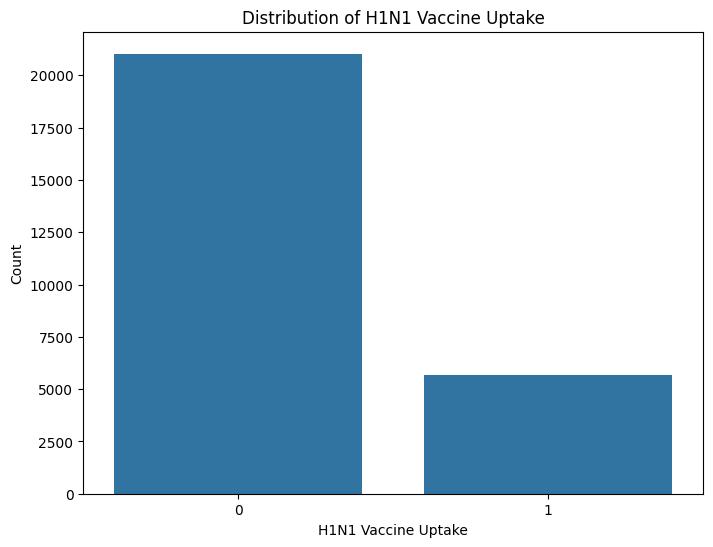

In [31]:
# Visualize the distribution of H1N1 vaccine uptake
plt.figure(figsize=(8, 6))
sns.countplot(x='h1n1_vaccine', data=df)
plt.title('Distribution of H1N1 Vaccine Uptake')
plt.xlabel('H1N1 Vaccine Uptake')
plt.ylabel('Count')
plt.show()



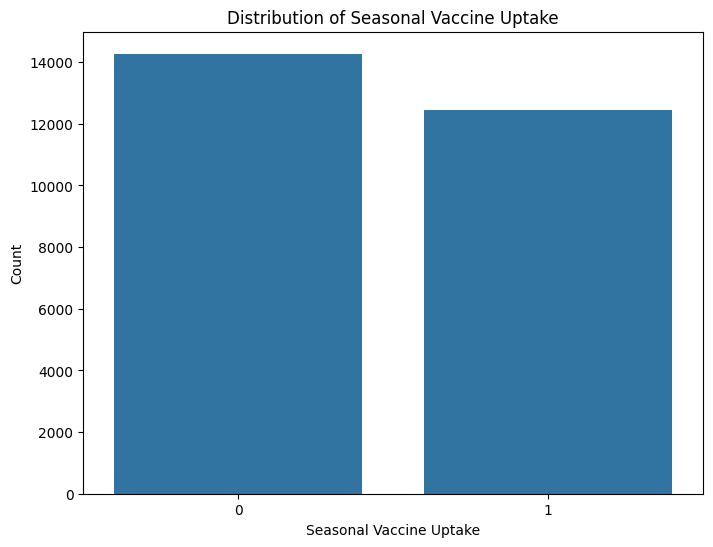

In [32]:
# Visualize the distribution of seasonal vaccine uptake
plt.figure(figsize=(8, 6))
sns.countplot(x='seasonal_vaccine', data=df)
plt.title('Distribution of Seasonal Vaccine Uptake')
plt.xlabel('Seasonal Vaccine Uptake')
plt.ylabel('Count')
plt.show()



In [45]:
# Correlation matrix for numerical columns
import seaborn as sns
@matplotlibinline


sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()



SyntaxError: invalid syntax (2469625465.py, line 6)

age_group
35 - 44 Years    1.667621
45 - 54 Years    1.664691
55 - 64 Years    1.664263
65+ Years        1.643183
18 - 34 Years    1.454999
Name: h1n1_concern, dtype: float64


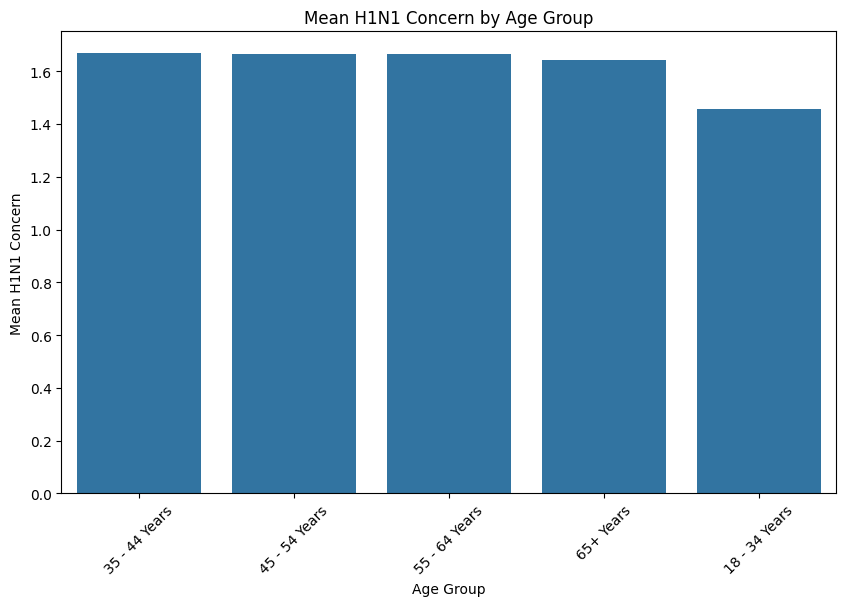

In [47]:
# Group by age group and calculate the mean of H1N1 concern
age_group_concern = df.groupby('age_group')['h1n1_concern'].mean().sort_values(ascending=False)
print(age_group_concern)

# Visualize the mean H1N1 concern by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_concern.index, y=age_group_concern.values)
plt.title('Mean H1N1 Concern by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



education
< 12 Years          1.779254
12 Years            1.672551
Some College        1.584554
College Graduate    1.573582
Name: h1n1_concern, dtype: float64


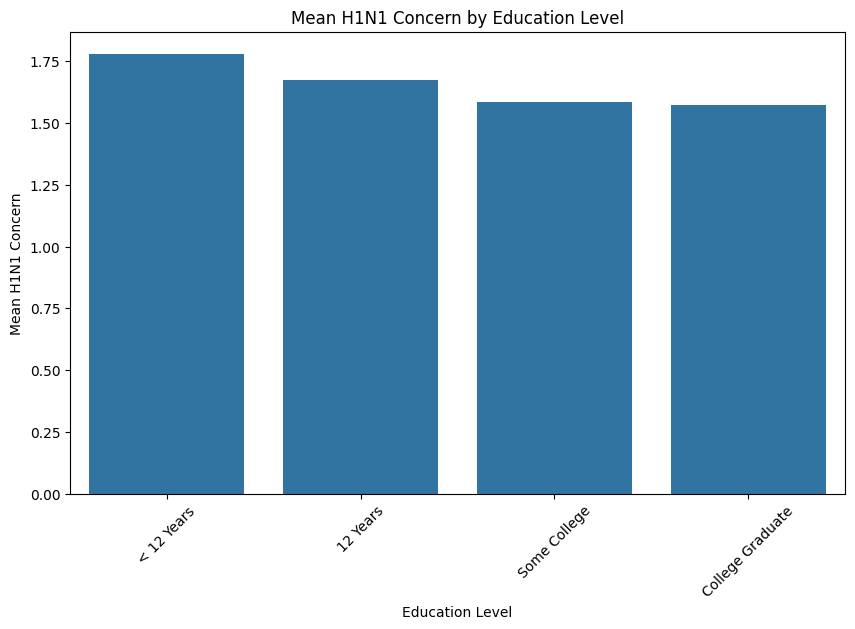

In [48]:
# Group by education level and calculate the mean of H1N1 concern
education_concern = df.groupby('education')['h1n1_concern'].mean().sort_values(ascending=False)
print(education_concern)

# Visualize the mean H1N1 concern by education level
plt.figure(figsize=(10, 6))
sns.barplot(x=education_concern.index, y=education_concern.values)
plt.title('Mean H1N1 Concern by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



income_poverty
Below Poverty                1.812756
<= $75,000, Above Poverty    1.601913
> $75,000                    1.577872
Name: h1n1_concern, dtype: float64

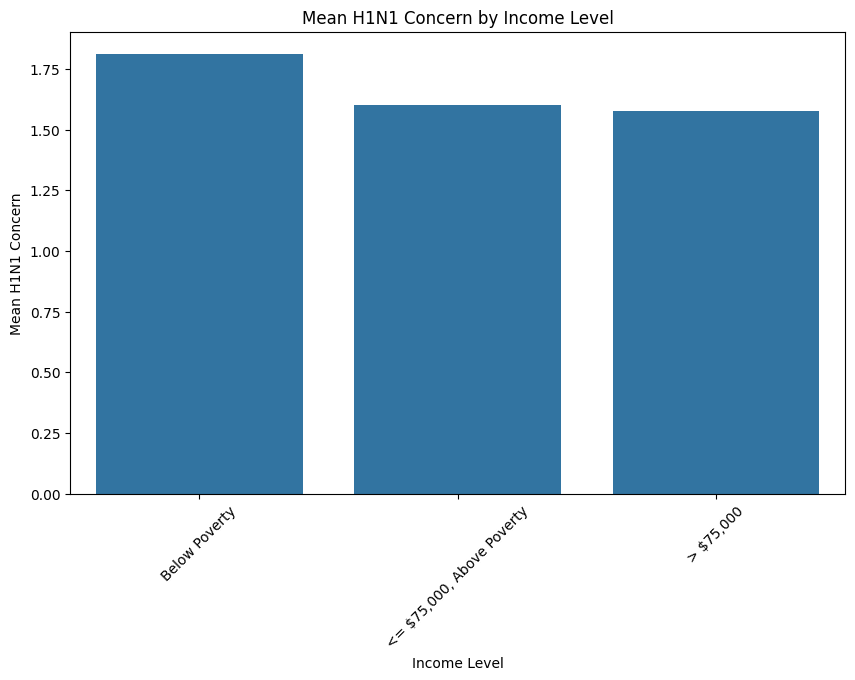

In [49]:
# Group by income level and calculate the mean of H1N1 concern
income_concern = df.groupby('income_poverty')['h1n1_concern'].mean().sort_values(ascending=False)
print(income_concern)

# Visualize the mean H1N1 concern by income level
plt.figure(figsize=(10, 6))
sns.barplot(x=income_concern.index, y=income_concern.values)
plt.title('Mean H1N1 Concern by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



health_worker
1.0    1.704561
0.0    1.608148
Name: h1n1_concern, dtype: float64


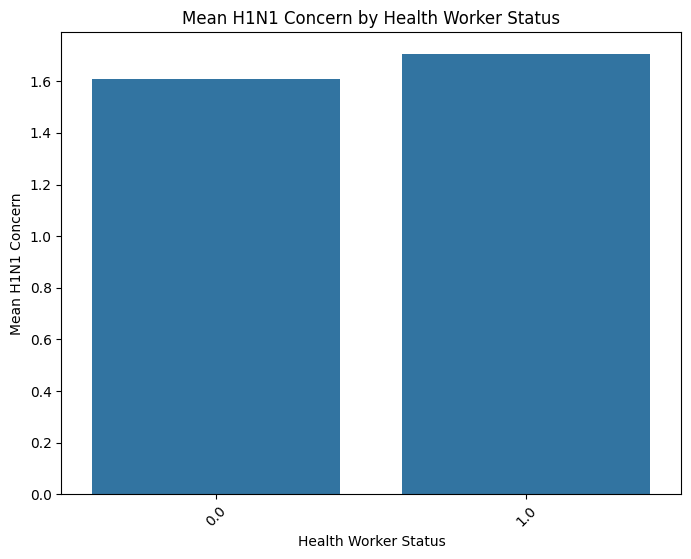

In [50]:
# Group by health worker status and calculate the mean of H1N1 concern
health_worker_concern = df.groupby('health_worker')['h1n1_concern'].mean().sort_values(ascending=False)
print(health_worker_concern)

# Visualize the mean H1N1 concern by health worker status
plt.figure(figsize=(8, 6))
sns.barplot(x=health_worker_concern.index, y=health_worker_concern.values)
plt.title('Mean H1N1 Concern by Health Worker Status')
plt.xlabel('Health Worker Status')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



chronic_med_condition
1.0    1.755647
0.0    1.564229
Name: h1n1_concern, dtype: float64


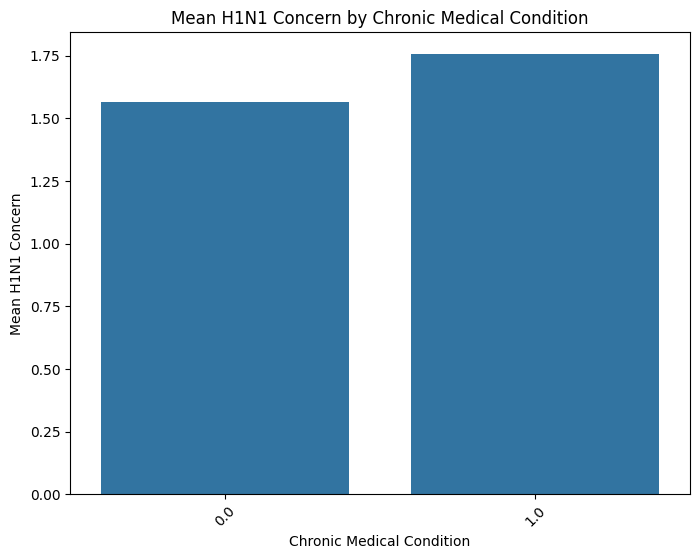

In [51]:
# Group by chronic medical condition and calculate the mean of H1N1 concern
chronic_condition_concern = df.groupby('chronic_med_condition')['h1n1_concern'].mean().sort_values(ascending=False)
print(chronic_condition_concern)

# Visualize the mean H1N1 concern by chronic medical condition
plt.figure(figsize=(8, 6))
sns.barplot(x=chronic_condition_concern.index, y=chronic_condition_concern.values)
plt.title('Mean H1N1 Concern by Chronic Medical Condition')
plt.xlabel('Chronic Medical Condition')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_h1n1_vacc_effective
5.0    1.882271
4.0    1.617395
3.0    1.518415
2.0    1.233010
1.0    0.878822
Name: h1n1_concern, dtype: float64


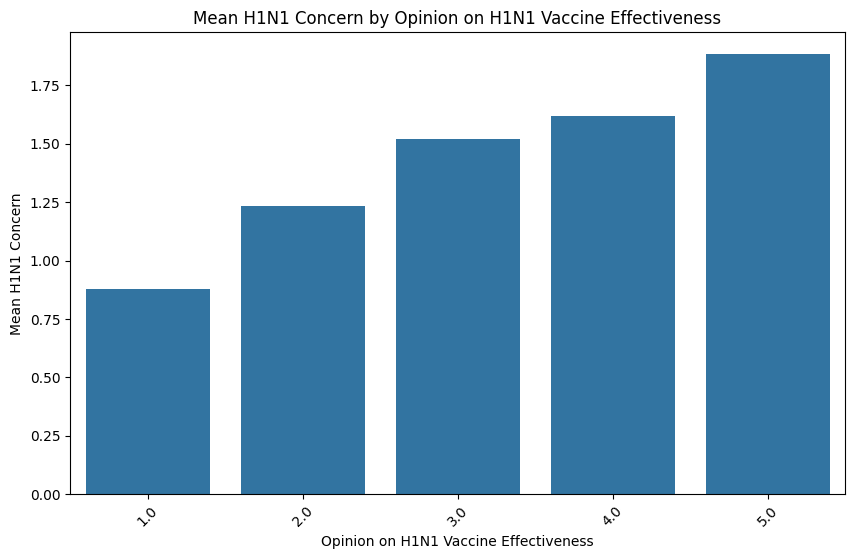

In [52]:
# Group by opinion on H1N1 vaccine effectiveness and calculate the mean of H1N1 concern
opinion_effectiveness_concern = df.groupby('opinion_h1n1_vacc_effective')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_effectiveness_concern)

# Visualize the mean H1N1 concern by opinion on H1N1 vaccine effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_effectiveness_concern.index, y=opinion_effectiveness_concern.values)
plt.title('Mean H1N1 Concern by Opinion on H1N1 Vaccine Effectiveness')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_h1n1_risk
5.0    2.216046
4.0    2.057589
3.0    1.730946
2.0    1.622424
1.0    1.178637
Name: h1n1_concern, dtype: float64


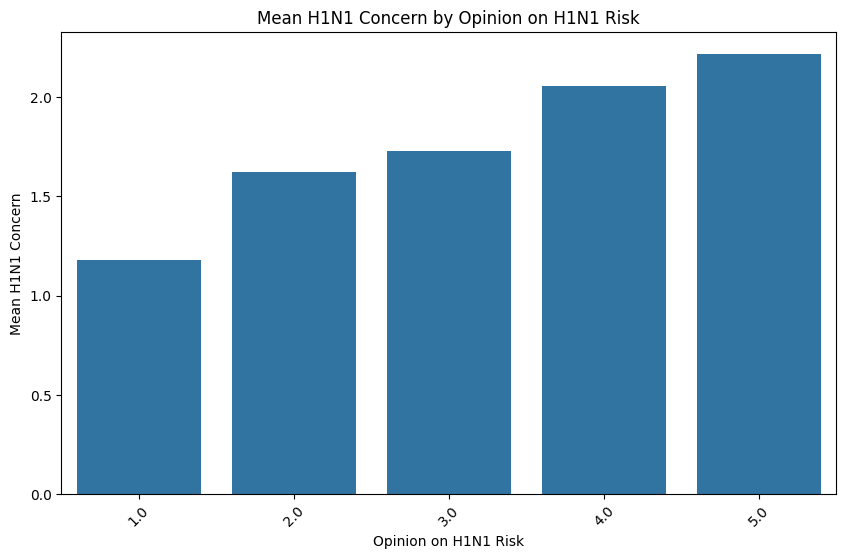

In [53]:
# Group by opinion on H1N1 risk and calculate the mean of H1N1 concern
opinion_risk_concern = df.groupby('opinion_h1n1_risk')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_risk_concern)

# Visualize the mean H1N1 concern by opinion on H1N1 risk
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_risk_concern.index, y=opinion_risk_concern.values)
plt.title('Mean H1N1 Concern by Opinion on H1N1 Risk')
plt.xlabel('Opinion on H1N1 Risk')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_h1n1_sick_from_vacc
5.0    2.225895
4.0    1.974816
2.0    1.634377
3.0    1.577778
1.0    1.222086
Name: h1n1_concern, dtype: float64


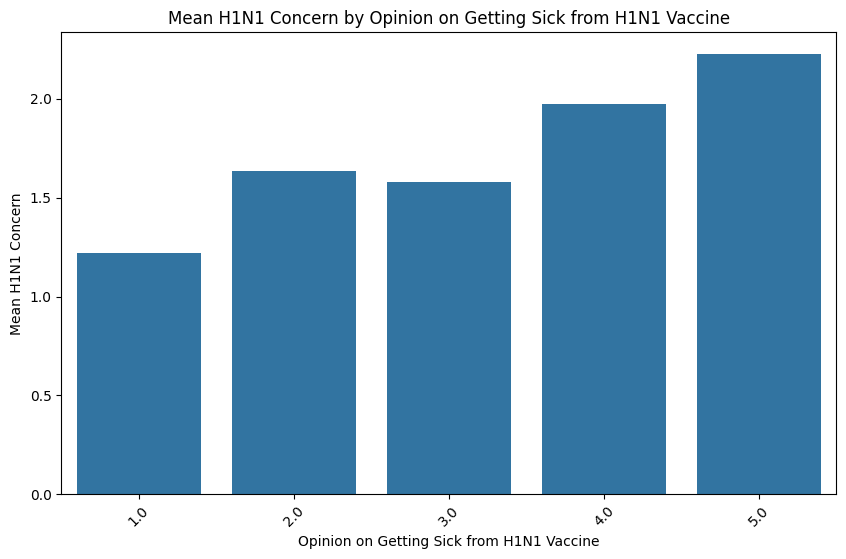

In [54]:
# Group by opinion on getting sick from H1N1 vaccine and calculate the mean of H1N1 concern
opinion_sick_concern = df.groupby('opinion_h1n1_sick_from_vacc')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_sick_concern)

# Visualize the mean H1N1 concern by opinion on getting sick from H1N1 vaccine
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_sick_concern.index, y=opinion_sick_concern.values)
plt.title('Mean H1N1 Concern by Opinion on Getting Sick from H1N1 Vaccine')
plt.xlabel('Opinion on Getting Sick from H1N1 Vaccine')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_seas_vacc_effective
5.0    1.831724
4.0    1.585307
3.0    1.370805
2.0    1.332879
1.0    0.962993
Name: h1n1_concern, dtype: float64


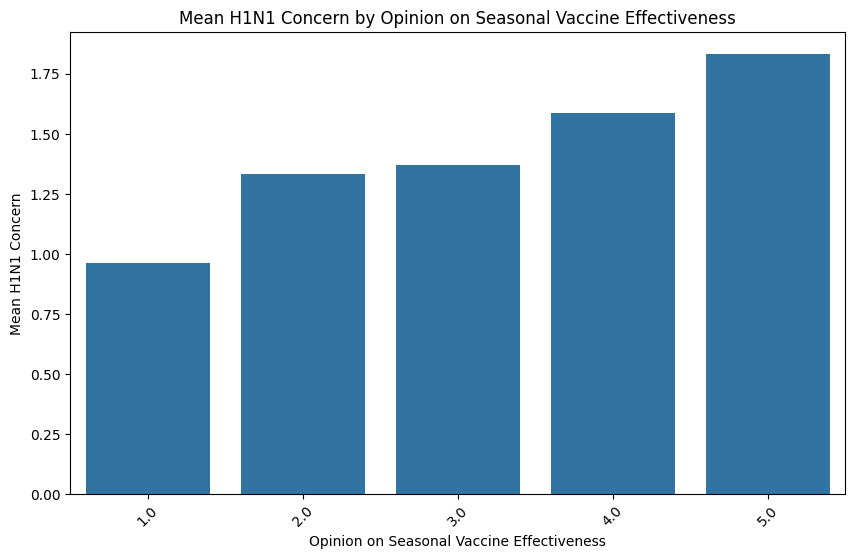

In [55]:
# Group by opinion on seasonal vaccine effectiveness and calculate the mean of H1N1 concern
opinion_seasonal_effectiveness_concern = df.groupby('opinion_seas_vacc_effective')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_seasonal_effectiveness_concern)

# Visualize the mean H1N1 concern by opinion on seasonal vaccine effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_seasonal_effectiveness_concern.index, y=opinion_seasonal_effectiveness_concern.values)
plt.title('Mean H1N1 Concern by Opinion on Seasonal Vaccine Effectiveness')
plt.xlabel('Opinion on Seasonal Vaccine Effectiveness')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_seas_risk
5.0    2.127840
4.0    1.871505
3.0    1.616208
2.0    1.525162
1.0    1.181772
Name: h1n1_concern, dtype: float64


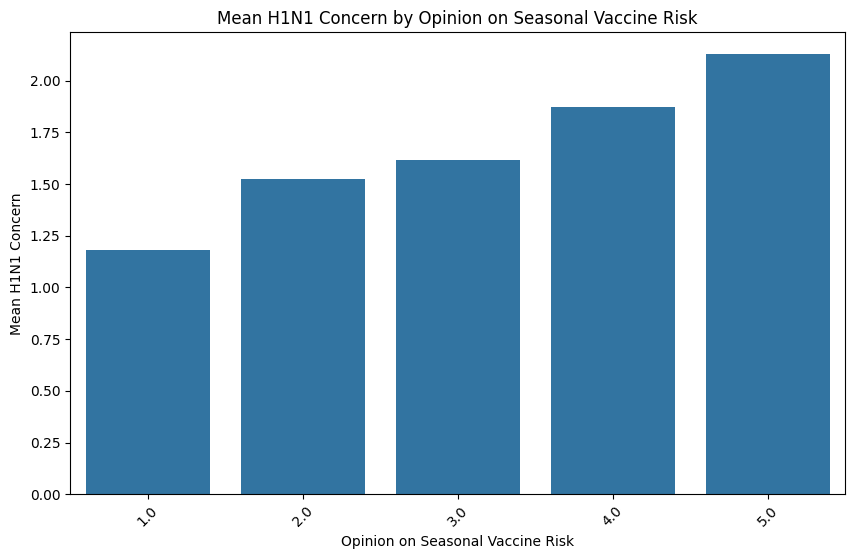

In [56]:
# Group by opinion on seasonal vaccine risk and calculate the mean of H1N1 concern
opinion_seasonal_risk_concern = df.groupby('opinion_seas_risk')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_seasonal_risk_concern)

# Visualize the mean H1N1 concern by opinion on seasonal vaccine risk
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_seasonal_risk_concern.index, y=opinion_seasonal_risk_concern.values)
plt.title('Mean H1N1 Concern by Opinion on Seasonal Vaccine Risk')
plt.xlabel('Opinion on Seasonal Vaccine Risk')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



opinion_seas_sick_from_vacc
5.0    2.032145
4.0    1.895270
2.0    1.656373
3.0    1.477778
1.0    1.421728
Name: h1n1_concern, dtype: float64


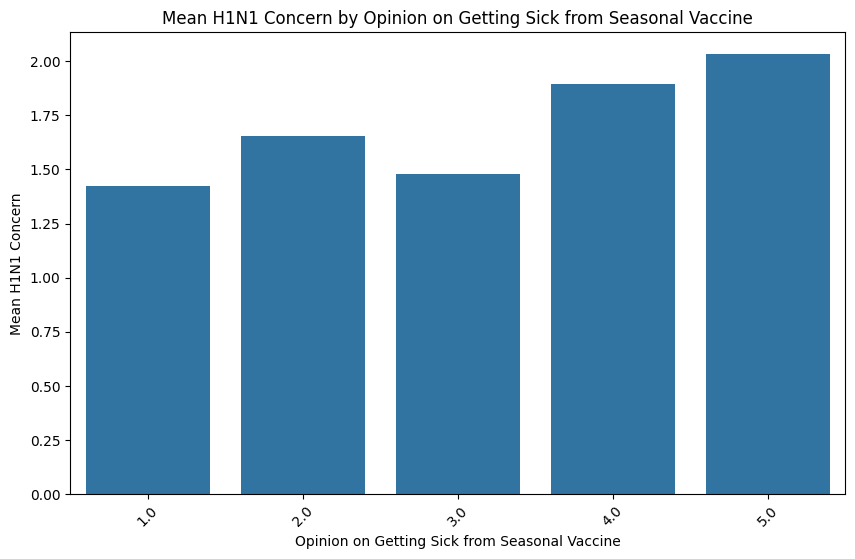

In [57]:
# Group by opinion on getting sick from seasonal vaccine and calculate the mean of H1N1 concern
opinion_seasonal_sick_concern = df.groupby('opinion_seas_sick_from_vacc')['h1n1_concern'].mean().sort_values(ascending=False)
print(opinion_seasonal_sick_concern)

# Visualize the mean H1N1 concern by opinion on getting sick from seasonal vaccine
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_seasonal_sick_concern.index, y=opinion_seasonal_sick_concern.values)
plt.title('Mean H1N1 Concern by Opinion on Getting Sick from Seasonal Vaccine')
plt.xlabel('Opinion on Getting Sick from Seasonal Vaccine')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_avoidance
1.0    1.750625
0.0    1.273910
Name: h1n1_concern, dtype: float64


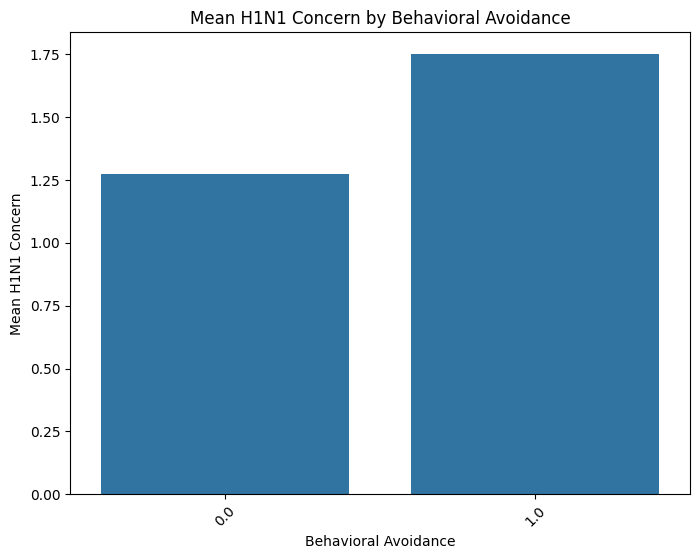

In [58]:
# Group by behavioral avoidance and calculate the mean of H1N1 concern
behavioral_avoidance_concern = df.groupby('behavioral_avoidance')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_avoidance_concern)

# Visualize the mean H1N1 concern by behavioral avoidance
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_avoidance_concern.index, y=behavioral_avoidance_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Avoidance')
plt.xlabel('Behavioral Avoidance')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_face_mask
1.0    2.141061
0.0    1.579872
Name: h1n1_concern, dtype: float64


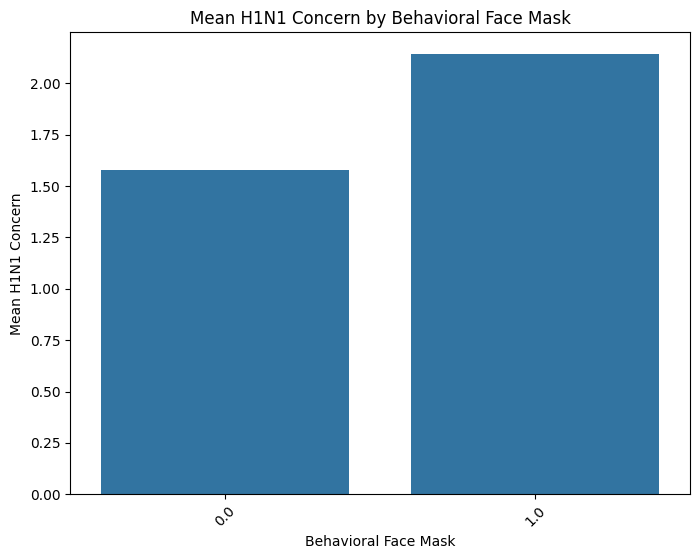

In [59]:
# Group by behavioral face mask and calculate the mean of H1N1 concern
behavioral_face_mask_concern = df.groupby('behavioral_face_mask')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_face_mask_concern)

# Visualize the mean H1N1 concern by behavioral face mask
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_face_mask_concern.index, y=behavioral_face_mask_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Face Mask')
plt.xlabel('Behavioral Face Mask')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_wash_hands
1.0    1.741335
0.0    1.036356
Name: h1n1_concern, dtype: float64


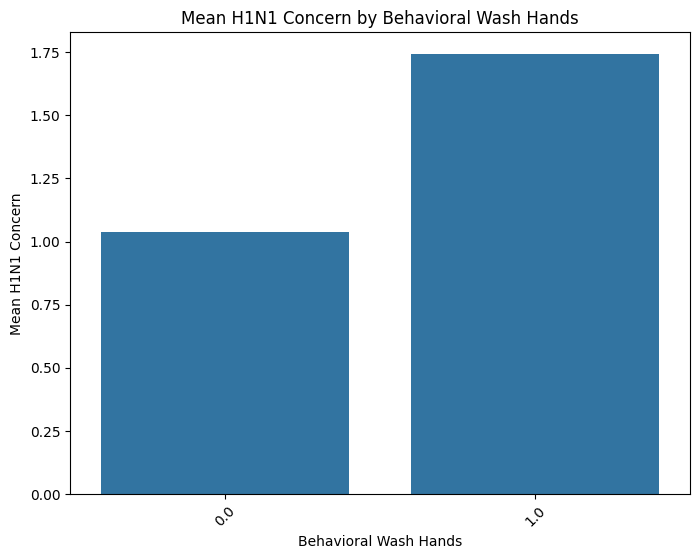

In [60]:
# Group by behavioral wash hands and calculate the mean of H1N1 concern
behavioral_wash_hands_concern = df.groupby('behavioral_wash_hands')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_wash_hands_concern)

# Visualize the mean H1N1 concern by behavioral wash hands
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_wash_hands_concern.index, y=behavioral_wash_hands_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Wash Hands')
plt.xlabel('Behavioral Wash Hands')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_large_gatherings
1.0    1.929284
0.0    1.445398
Name: h1n1_concern, dtype: float64


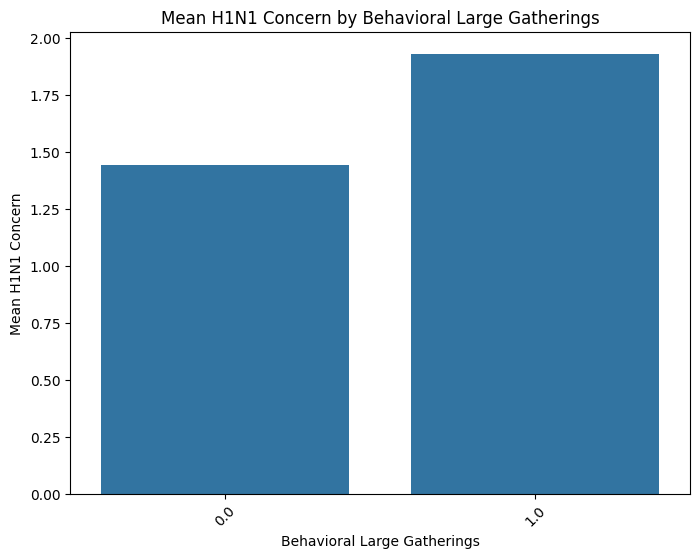

In [61]:
# Group by behavioral large gatherings and calculate the mean of H1N1 concern
behavioral_large_gatherings_concern = df.groupby('behavioral_large_gatherings')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_large_gatherings_concern)

# Visualize the mean H1N1 concern by behavioral large gatherings
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_large_gatherings_concern.index, y=behavioral_large_gatherings_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Large Gatherings')
plt.xlabel('Behavioral Large Gatherings')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_outside_home
1.0    1.932946
0.0    1.458565
Name: h1n1_concern, dtype: float64


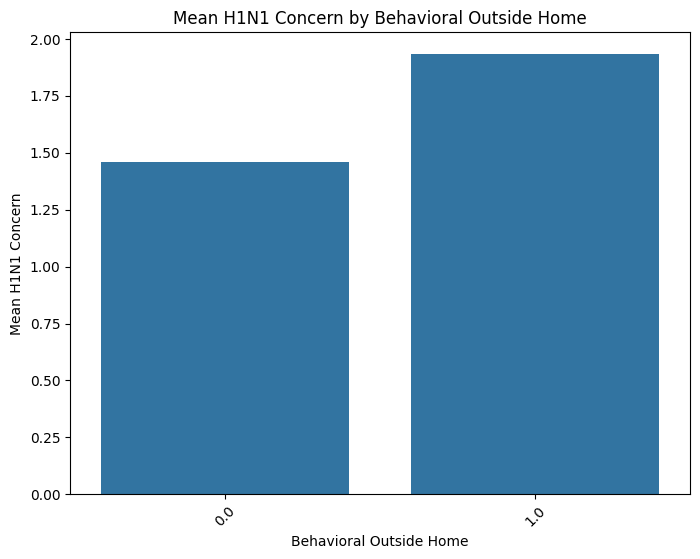

In [62]:
# Group by behavioral outside home and calculate the mean of H1N1 concern
behavioral_outside_home_concern = df.groupby('behavioral_outside_home')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_outside_home_concern)

# Visualize the mean H1N1 concern by behavioral outside home
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_outside_home_concern.index, y=behavioral_outside_home_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Outside Home')
plt.xlabel('Behavioral Outside Home')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



behavioral_touch_face
1.0    1.775223
0.0    1.292277
Name: h1n1_concern, dtype: float64


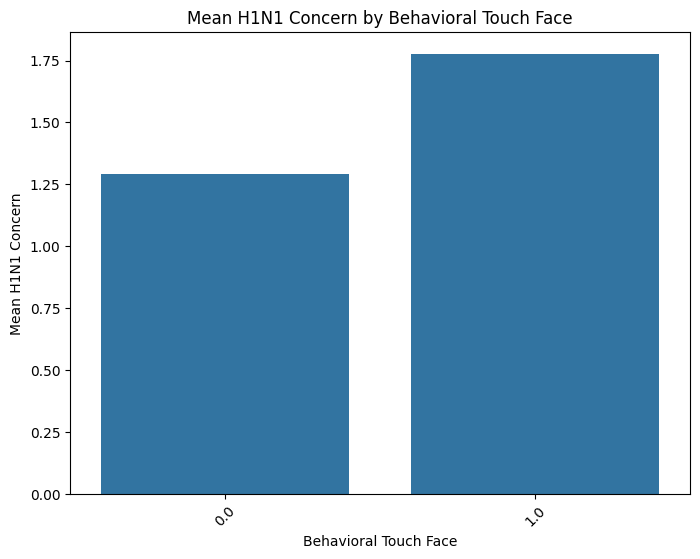

In [63]:
# Group by behavioral touch face and calculate the mean of H1N1 concern
behavioral_touch_face_concern = df.groupby('behavioral_touch_face')['h1n1_concern'].mean().sort_values(ascending=False)
print(behavioral_touch_face_concern)

# Visualize the mean H1N1 concern by behavioral touch face
plt.figure(figsize=(8, 6))
sns.barplot(x=behavioral_touch_face_concern.index, y=behavioral_touch_face_concern.values)
plt.title('Mean H1N1 Concern by Behavioral Touch Face')
plt.xlabel('Behavioral Touch Face')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



doctor_recc_h1n1
1.0    1.866568
0.0    1.537635
Name: h1n1_concern, dtype: float64


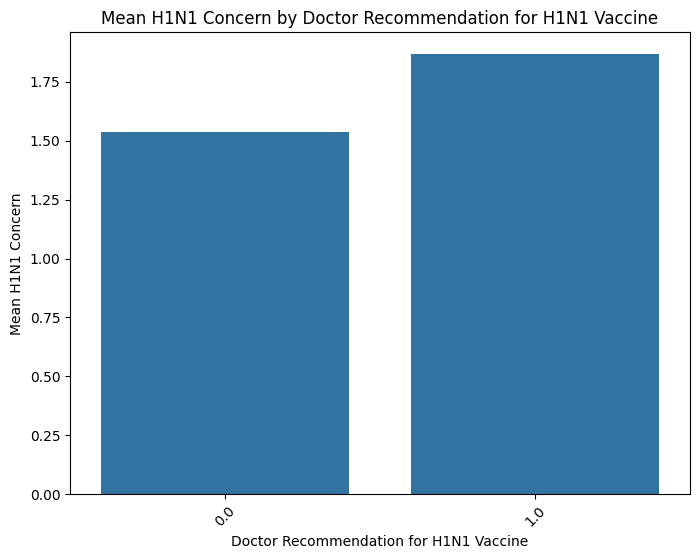

In [64]:
# Group by doctor recommendation for H1N1 vaccine and calculate the mean of H1N1 concern
doctor_recc_h1n1_concern = df.groupby('doctor_recc_h1n1')['h1n1_concern'].mean().sort_values(ascending=False)
print(doctor_recc_h1n1_concern)

# Visualize the mean H1N1 concern by doctor recommendation for H1N1 vaccine
plt.figure(figsize=(8, 6))
sns.barplot(x=doctor_recc_h1n1_concern.index, y=doctor_recc_h1n1_concern.values)
plt.title('Mean H1N1 Concern by Doctor Recommendation for H1N1 Vaccine')
plt.xlabel('Doctor Recommendation for H1N1 Vaccine')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



doctor_recc_seasonal
1.0    1.785582
0.0    1.523810
Name: h1n1_concern, dtype: float64


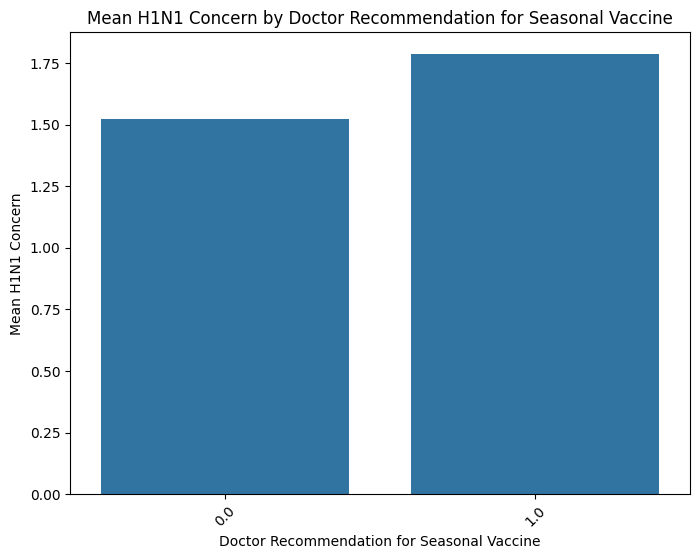

In [65]:
# Group by doctor recommendation for seasonal vaccine and calculate the mean of H1N1 concern
doctor_recc_seasonal_concern = df.groupby('doctor_recc_seasonal')['h1n1_concern'].mean().sort_values(ascending=False)
print(doctor_recc_seasonal_concern)

# Visualize the mean H1N1 concern by doctor recommendation for seasonal vaccine
plt.figure(figsize=(8, 6))
sns.barplot(x=doctor_recc_seasonal_concern.index, y=doctor_recc_seasonal_concern.values)
plt.title('Mean H1N1 Concern by Doctor Recommendation for Seasonal Vaccine')
plt.xlabel('Doctor Recommendation for Seasonal Vaccine')
plt.ylabel('Mean H1N1 Concern')
plt.xticks(rotation=45)
plt.show()



chronic_med_condition
1.0    0.275446
0.0    0.188876
Name: h1n1_vaccine, dtype: float64

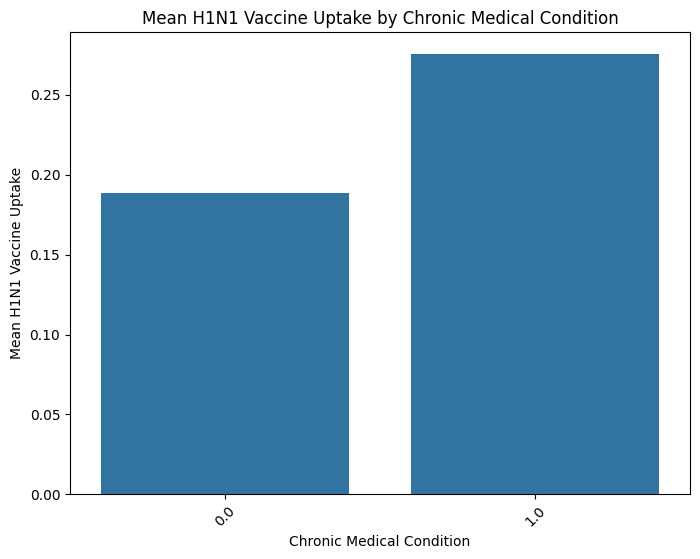

In [66]:
# Group by chronic medical condition and calculate the mean of H1N1 vaccine uptake
chronic_condition_vaccine = df.groupby('chronic_med_condition')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(chronic_condition_vaccine)

# Visualize the mean H1N1 vaccine uptake by chronic medical condition
plt.figure(figsize=(8, 6))
sns.barplot(x=chronic_condition_vaccine.index, y=chronic_condition_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Chronic Medical Condition')
plt.xlabel('Chronic Medical Condition')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()



health_worker
1.0    0.409452
0.0    0.188793
Name: h1n1_vaccine, dtype: float64


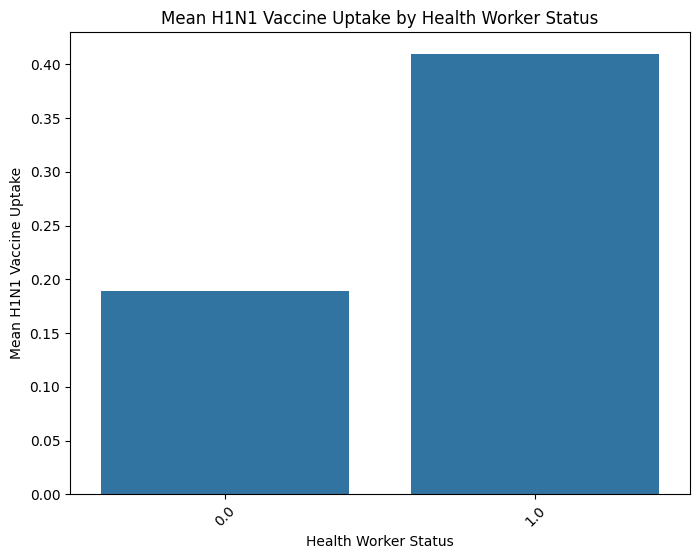

In [67]:
# Group by health worker status and calculate the mean of H1N1 vaccine uptake
health_worker_vaccine = df.groupby('health_worker')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(health_worker_vaccine)

# Visualize the mean H1N1 vaccine uptake by health worker status
plt.figure(figsize=(8, 6))
sns.barplot(x=health_worker_vaccine.index, y=health_worker_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Health Worker Status')
plt.xlabel('Health Worker Status')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()



opinion_h1n1_vacc_effective
5.0    0.404828
4.0    0.176410
3.0    0.105653
2.0    0.051130
1.0    0.047404
Name: h1n1_vaccine, dtype: float64


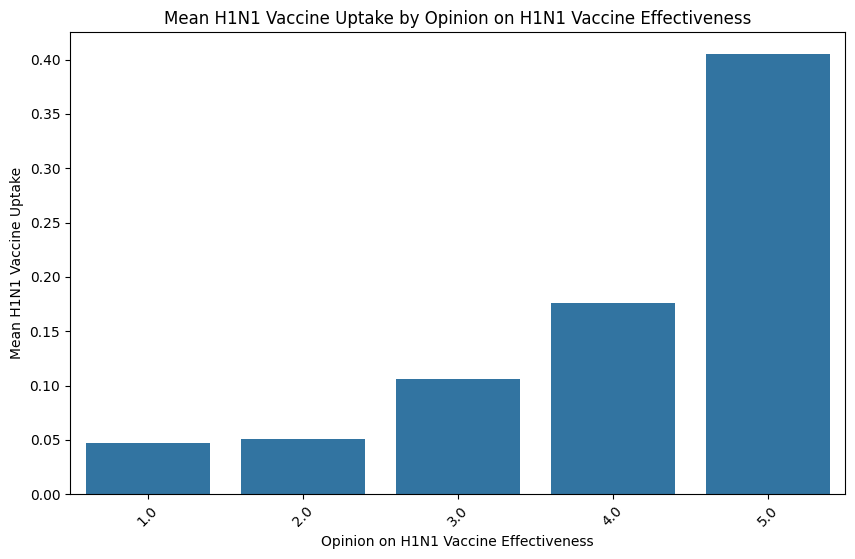

In [68]:
# Group by opinion on H1N1 vaccine effectiveness and calculate the mean of H1N1 vaccine uptake
opinion_effectiveness_vaccine = df.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(opinion_effectiveness_vaccine)

# Visualize the mean H1N1 vaccine uptake by opinion on H1N1 vaccine effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_effectiveness_vaccine.index, y=opinion_effectiveness_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Opinion on H1N1 Vaccine Effectiveness')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()

opinion_h1n1_risk
5.0    0.510857
4.0    0.392102
3.0    0.173679
2.0    0.167960
1.0    0.088340
Name: h1n1_vaccine, dtype: float64


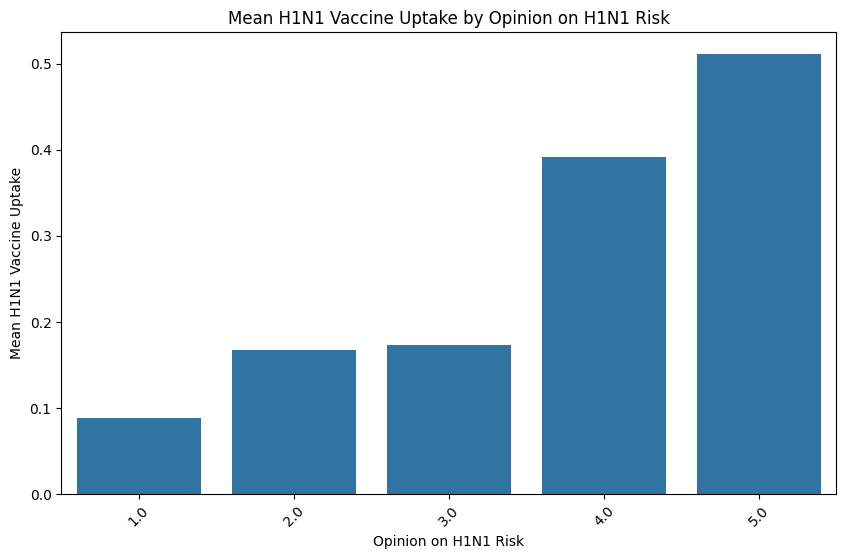

In [69]:
# Group by opinion on H1N1 risk and calculate the mean of H1N1 vaccine uptake
opinion_risk_vaccine = df.groupby('opinion_h1n1_risk')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(opinion_risk_vaccine)

# Visualize the mean H1N1 vaccine uptake by opinion on H1N1 risk
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_risk_vaccine.index, y=opinion_risk_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Opinion on H1N1 Risk')
plt.xlabel('Opinion on H1N1 Risk')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()

opinion_h1n1_sick_from_vacc
5.0    0.280293
4.0    0.264274
1.0    0.204601
2.0    0.173184
3.0    0.081081
Name: h1n1_vaccine, dtype: float64


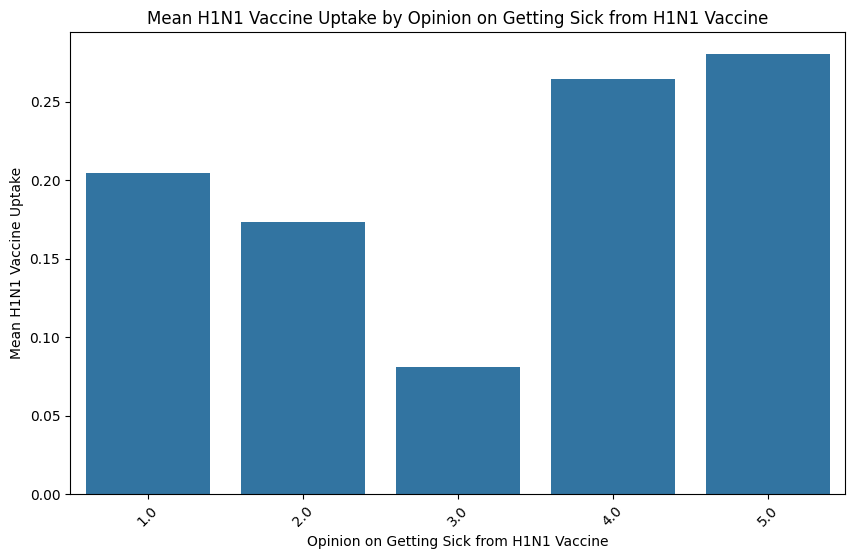

In [70]:
# Group by opinion on getting sick from H1N1 vaccine and calculate the mean of H1N1 vaccine uptake
opinion_sick_vaccine = df.groupby('opinion_h1n1_sick_from_vacc')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(opinion_sick_vaccine)

# Visualize the mean H1N1 vaccine uptake by opinion on getting sick from H1N1 vaccine
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_sick_vaccine.index, y=opinion_sick_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Opinion on Getting Sick from H1N1 Vaccine')
plt.xlabel('Opinion on Getting Sick from H1N1 Vaccine')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()

doctor_recc_h1n1
1.0    0.532359
0.0    0.136371
Name: h1n1_vaccine, dtype: float64


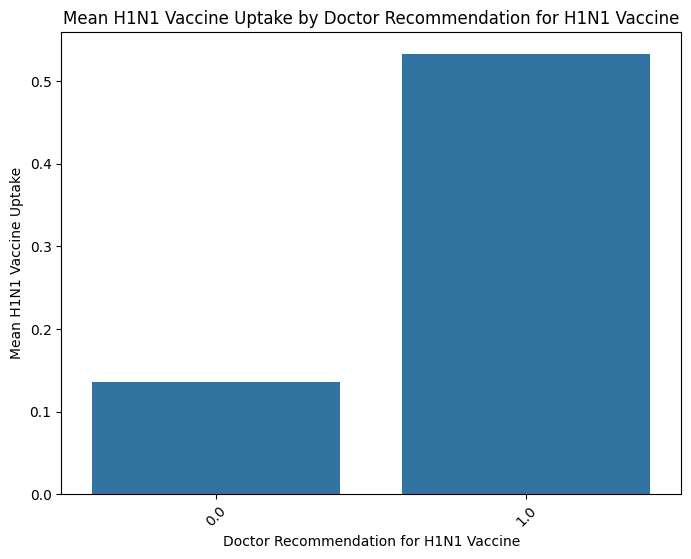

In [71]:
# Group by doctor recommendation for H1N1 vaccine and calculate the mean of H1N1 vaccine uptake
doctor_recc_h1n1_vaccine = df.groupby('doctor_recc_h1n1')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(doctor_recc_h1n1_vaccine)

# Visualize the mean H1N1 vaccine uptake by doctor recommendation for H1N1 vaccine
plt.figure(figsize=(8, 6))
sns.barplot(x=doctor_recc_h1n1_vaccine.index, y=doctor_recc_h1n1_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Doctor Recommendation for H1N1 Vaccine')
plt.xlabel('Doctor Recommendation for H1N1 Vaccine')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()

doctor_recc_seasonal
1.0    0.348283
0.0    0.162280
Name: h1n1_vaccine, dtype: float64


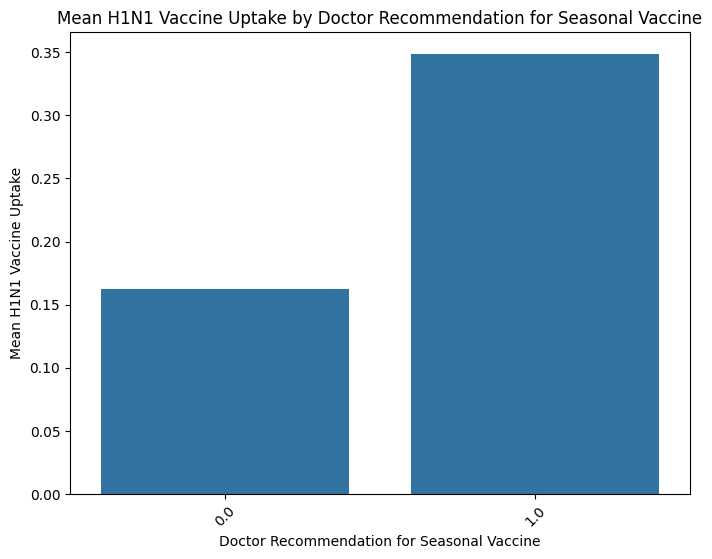

In [72]:
# Group by doctor recommendation for seasonal vaccine and calculate the mean of H1N1 vaccine uptake
doctor_recc_seasonal_vaccine = df.groupby('doctor_recc_seasonal')['h1n1_vaccine'].mean().sort_values(ascending=False)
print(doctor_recc_seasonal_vaccine)

# Visualize the mean H1N1 vaccine uptake by doctor recommendation for seasonal vaccine
plt.figure(figsize=(8, 6))
sns.barplot(x=doctor_recc_seasonal_vaccine.index, y=doctor_recc_seasonal_vaccine.values)
plt.title('Mean H1N1 Vaccine Uptake by Doctor Recommendation for Seasonal Vaccine')
plt.xlabel('Doctor Recommendation for Seasonal Vaccine')
plt.ylabel('Mean H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

# Assuming you have test data (X_test, y_test)
y_pred = model.predict(X_test)  # Get predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
y_pred = model.predict(X_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R² Score: {r2:.4f}')


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 0.1194
R² Score: 0.2862


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get raw probability predictions
y_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_pred = np.where(y_prob >= 0.5, 1, 0)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:

# Now calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 83.34%


To save your trained model into a pickle (.pkl) file, you can use Python’s pickle or joblib library. Here's how you can do it:

**Using pickle**

In [74]:
import pickle

# Save the model
with open('seasonal_vaccine_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [75]:
import pickle
# Load the model
with open('seasonal_vaccine_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


**Using joblib (Recommended for large models)**

In [76]:
import joblib

# Save the model
joblib.dump(model, 'seasonal_vaccine_model.pkl')

# Load the model
loaded_model = joblib.load('seasonal_vaccine_model.pkl')


*checking if the model is working or not*

In [77]:
prediction = loaded_model.predict(X_test)

prediction.shape

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(5342, 1)